In [7]:
import os,sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from obspy import read
from obspy.core import UTCDateTime
from obspy.clients.fdsn import Client
from pull_wf_by_evid import *
sys.path.append(os.path.join('..', 'python'))

In [8]:
phases_df = format_aqms_csv('MtBaker_20km_radius_phases.csv')

In [9]:
lf_baker = get_phase_entries(phases_df, 60493937)

In [10]:
pick = lf_baker[lf_baker.sta == 'MBW'].iloc[0, :] if not lf_baker.empty else None

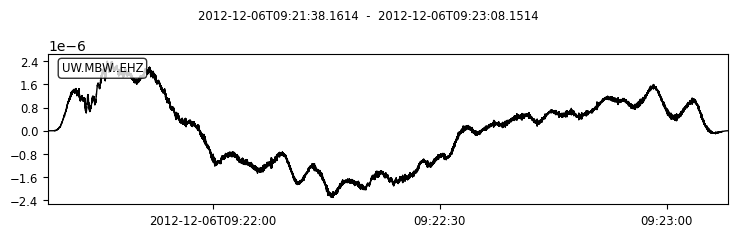

In [11]:
st = get_waveforms_from_phases('IRIS', pick)

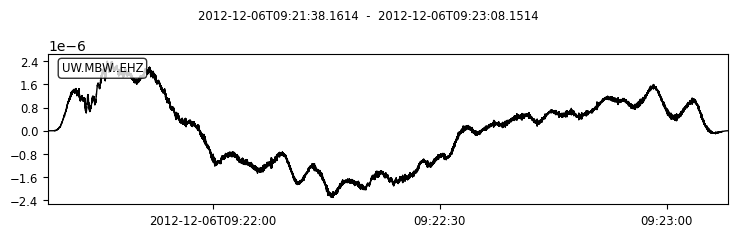

Waveforms saved to ../../results/waveforms/UW.MBW..EHZ.60493937.mseed


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


In [12]:
output = get_waveforms('MtBaker_20km_radius_phases.csv',60493937,'IRIS', pick)

1 Trace(s) in Stream:
UW.MBW..EHZ | 2012-12-06T09:21:38.161400Z - 2012-12-06T09:23:08.151400Z | 100.0 Hz, 9000 samples


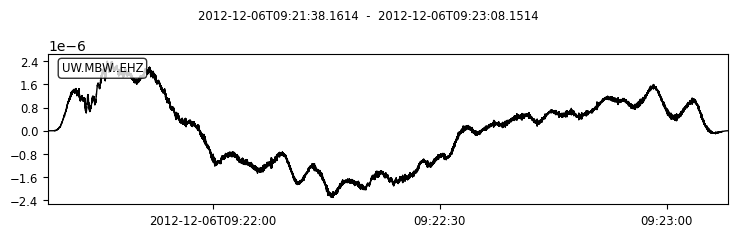

In [14]:
tr = read('../../results/waveforms/UW.MBW..EHZ.60493937.mseed')
print(tr)
tr.plot();